In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
sars=pd.read_csv("sars_2003_complete_dataset_clean.csv")

In [80]:
sars.head()

,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,2003-03-17,Germany,1,0,0
1,2003-03-17,Canada,8,2,0
2,2003-03-17,Singapore,20,0,0
3,2003-03-17,"Hong Kong SAR, China",95,1,0
4,2003-03-17,Switzerland,2,0,0


In [81]:
sars["Date"]=pd.to_datetime(sars["Date"])

In [82]:
sars.describe()

,Cumulative number of case(s),Number of deaths,Number recovered
count,2538.000000,2538.000000,2538.000000
mean,219.211978,17.812845,134.678487
std,825.024564,61.425627,581.595350
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000
50%,3.000000,0.000000,2.000000
75%,14.750000,2.000000,9.000000
max,5329.000000,348.000000,4941.000000


In [83]:
sars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 5 columns):
Date                            2538 non-null datetime64[ns]
Country                         2538 non-null object
Cumulative number of case(s)    2538 non-null int64
Number of deaths                2538 non-null int64
Number recovered                2538 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 99.3+ KB


In [84]:
sars["Country"].nunique()

37

In [85]:
#to check if there are any null values in the dataset
sars.isna().sum()


Date                            0
Country                         0
Cumulative number of case(s)    0
Number of deaths                0
Number recovered                0
dtype: int64

In [86]:
sars["Country"]

0                    Germany
1                     Canada
2                  Singapore
3       Hong Kong SAR, China
4                Switzerland
                ...         
2533             Switzerland
2534                Thailand
2535          United Kingdom
2536           United States
2537                Viet Nam
Name: Country, Length: 2538, dtype: object

In [87]:
#Average death per country
No_ofDeaths=sars["Number of deaths"].groupby(sars["Country"]).mean()
print(No_ofDeaths)

Country
Australia                 0.000000
Belgium                   0.000000
Brazil                    0.000000
Bulgaria                  0.000000
Canada                   20.989583
China                   205.604167
Colombia                  0.000000
Finland                   0.000000
France                    0.011111
Germany                   0.000000
Hong Kong SAR, China    176.291667
India                     0.000000
Indonesia                 0.000000
Italy                     0.000000
Japan                     0.000000
Kuwait                    0.000000
Macao SAR, China          0.000000
Malaysia                  1.810127
Mongolia                  0.000000
New Zealand               0.000000
Philippines               1.763889
Poland                    0.000000
Republic of Ireland       0.000000
Republic of Korea         0.000000
Romania                   0.000000
Russian Federation        0.000000
Singapore                21.375000
Slovenia                  0.000000
South Africa

In [138]:
Cases=sars["Cumulative number of case(s)"].groupby(sars["Date"]).sum()
#print(Cases)
Deaths=sars["Number of deaths"].groupby(sars["Date"]).sum()
#print(Deaths)
Recovered=sars["Number recovered"].groupby(sars["Date"]).sum()
#print(Recovered)
Over=[Cases,Deaths,Recovered]
print(Over)
Overview=pd.DataFrame(Over,index=["Cases","Deaths","Recovered"]).transpose()
Overview.reset_index(inplace=True)

[Date
2003-03-17     167
2003-03-18     219
2003-03-19     264
2003-03-20     306
2003-03-21     350
              ... 
2003-07-07    8434
2003-07-08    8431
2003-07-09    8431
2003-07-10    8432
2003-07-11    8432
Name: Cumulative number of case(s), Length: 96, dtype: int64, Date
2003-03-17      4
2003-03-18      4
2003-03-19      9
2003-03-20     10
2003-03-21     10
             ... 
2003-07-07    812
2003-07-08    812
2003-07-09    812
2003-07-10    812
2003-07-11    813
Name: Number of deaths, Length: 96, dtype: int64, Date
2003-03-17       0
2003-03-18       0
2003-03-19       0
2003-03-20       0
2003-03-21       0
              ... 
2003-07-07    7426
2003-07-08    7428
2003-07-09    7438
2003-07-10    7444
2003-07-11    7447
Name: Number recovered, Length: 96, dtype: int64]


In [150]:
Overview.tail()

,Date,Cases,Deaths,Recovered
91,2003-07-07,8434,812,7426
92,2003-07-08,8431,812,7428
93,2003-07-09,8431,812,7438
94,2003-07-10,8432,812,7444
95,2003-07-11,8432,813,7447


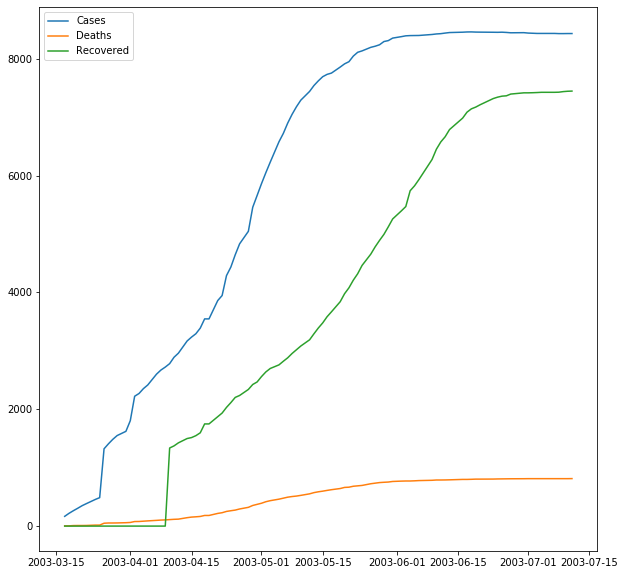

In [148]:
plt.figure(figsize=(10,10))
plt.plot(Overview["Date"],Overview["Cases"],label="Cases")
plt.plot(Overview["Date"],Overview["Deaths"],label="Deaths")
plt.plot(Overview["Date"],Overview["Recovered"],label="Recovered")
plt.legend()
